In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
data = pd.Series(range(10))
roll = data.rolling(3)
data
roll.apply(lambda x: np.sum(x))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


0     NaN
1     NaN
2     3.0
3     6.0
4     9.0
5    12.0
6    15.0
7    18.0
8    21.0
9    24.0
dtype: float64

In [54]:
df = pd.DataFrame(np.random.randn(100,3),columns = ['x1','x2','x3'])
df.head()

,x1,x2,x3
0,-0.214006,-1.132819,-0.839568
1,0.266031,0.694798,2.914819
2,1.121078,1.541466,-0.365708
3,0.627945,0.764598,-0.842575
4,0.158085,-1.527687,-0.070808


In [16]:
df.shape

(100, 3)

In [17]:
df.dtypes

x1    float64
x2    float64
x3    float64
dtype: object

In [18]:
df.isna().sum()

x1    0
x2    0
x3    0
dtype: int64

In [49]:
df.dropna(subset = ['x1','x2'], inplace = True)

In [19]:
df.sort_values('x1').head()

,x1,x2,x3
92,-2.089161,0.063125,0.477252
32,-1.765584,-1.818304,-0.223847
25,-1.661032,-0.407543,-0.127826
87,-1.396335,-0.382469,1.786206
64,-1.266224,1.542804,-0.033324


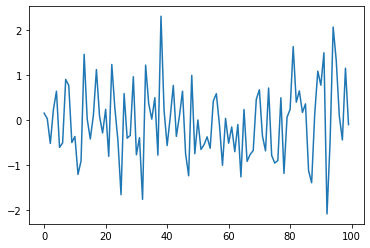

In [20]:
df.x1.plot()

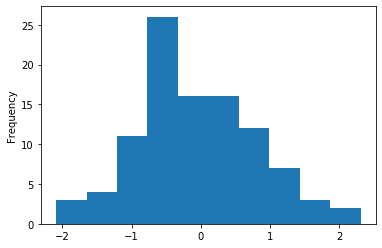

In [22]:
df.x1.plot(kind = 'hist')

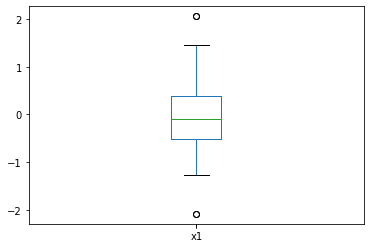

In [27]:
df.loc[df.x2 > 0,'x1'].plot(kind = 'box')
df[df.x2 > 0]['x1'].plot(kind = 'box')

In [28]:
df.x1.sample(3)

88    0.130285
21   -0.809019
73    0.709396
Name: x1, dtype: float64

In [ ]:
# pd.to_datetime(df.film_date, unit='s').head()

In [31]:
df['x4'] = (df['x1'] > 0)

In [33]:
df.x4.value_counts().sort_index()

False    50
True     50
Name: x4, dtype: int64

In [39]:
df.groupby('x4').agg(['mean','count','sum'])

x1                         x2                        x3        \
           mean count        sum      mean count       sum      mean count   
x4                                                                           
False -0.707779    50 -35.388930  0.099897    50  4.994869 -0.295812    50   
True   0.622699    50  31.134934 -0.100117    50 -5.005862 -0.026376    50   

                  
             sum  
x4                
False -14.790615  
True   -1.318814

In [50]:
df['x5'] = df.x1.apply(lambda x: 1 if (x > -0.3) & (x < 0.3) else 0)
df[df.x4 == True].x5.value_counts(normalize=True)

0    0.62
1    0.38
Name: x5, dtype: float64

In [56]:
# define normalization function
def normalize(df, pd_series):
    pd_series = pd_series.astype(float)

    # Find upper and lower bound for outliers
    avg = np.mean(pd_series)
    sd  = np.std(pd_series)
    lower_bound = avg - 2*sd
    upper_bound = avg + 2*sd

    # Collapse in the outliers
    df.loc[pd_series < lower_bound , "cutoff_rate" ] = lower_bound
    df.loc[pd_series > upper_bound , "cutoff_rate" ] = upper_bound

    # Finally, take the log
    normalized_price = df["cutoff_rate"].astype(float)
    
    return normalized_price

***vectorizing in numpy might be faster***
使用 df['x1'].values 代替 df['x1']

In [ ]:
# Convert pandas arrays to NumPy ndarrays
np_lat = df['latitude'].values
np_lon = df['longitude'].values
df['distance'] = operatordtion(df['latitude'].values, df['longitude'].values)